<a href="https://colab.research.google.com/github/aryafridayana/Machine-Learning/blob/main/UTS/UTS_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Arya Fridayana Gastiadi

1103210082

Dataset : Credit Score Classification, Model : Random Forest

##Memuat Library

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

##Memuat Data

In [2]:
train = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")
train.head()

<ipython-input-2-a8cad45718ef>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")


,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

Simpulannya, dataset ini memiliki informasi yang kaya tentang pelanggan dan keuangan mereka, tetapi memerlukan sedikit pembersihan data dan mungkin transformasi tipe data sebelum dapat digunakan untuk analisis lebih lanjut.

##Data Preprocess:

Data Format

In [4]:
# Age / Loans / Delayed Payments
train['Age'] = train['Age'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Loan'] = train['Num_of_Loan'].fillna('0').str.extract('(\d+)').astype(float).astype(int)
train['Num_of_Delayed_Payment'] = train['Num_of_Delayed_Payment'].fillna('0').str.extract('(\d+)').astype(float).astype(int)

In [9]:
# Annual Income
train['Annual_Income'] = train['Annual_Income'].str.replace(r'[^0-9.]', '', regex=True)
train['Annual_Income'] = train['Annual_Income'].astype(float)

In [8]:
# Credit Limit
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].replace('_', np.nan)
train['Changed_Credit_Limit'] = pd.to_numeric(train['Changed_Credit_Limit'], errors='coerce')
train['Changed_Credit_Limit'] = train['Changed_Credit_Limit'].fillna(0)

In [7]:
# Outstanding Debt
# Convert data ke numeric
train['Outstanding_Debt'] = train['Outstanding_Debt'].astype(str)
train['Outstanding_Debt'] = train['Outstanding_Debt'].str.replace(r'[^0-9.]', '', regex=True)
train['Outstanding_Debt'] = pd.to_numeric(train['Outstanding_Debt'], errors='coerce')
train['Outstanding_Debt'] = train['Outstanding_Debt'].fillna(0)

In [6]:
# Monthly Investation
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].astype(str)
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].replace('', '0')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].str.replace(r'[^0-9.]', '')
train['Amount_invested_monthly'] = pd.to_numeric(train['Amount_invested_monthly'], errors='coerce')
train['Amount_invested_monthly'] = train['Amount_invested_monthly'].fillna(0)

In [5]:
# Monthly Balance
train['Monthly_Balance'] = train['Monthly_Balance'].astype(str)
train['Monthly_Balance'] = train['Monthly_Balance'].str.replace(r'[^0-9.-]+', '')
train['Monthly_Balance'] = pd.to_numeric(train['Monthly_Balance'], errors='coerce')
train['Monthly_Balance'] = train['Monthly_Balance'].fillna(0)

In [10]:
# Credit History Age
# Konversi datanya untuk konstruksi model lebih baik

def parse_years_and_months(age):
    if isinstance(age, str):
        age_parts = age.split(' Years and ')
        years = int(age_parts[0]) if 'Years' in age else 0
        months_str = age_parts[1].split(' Months')[0] if 'Months' in age_parts[1] else '0'
        months = int(months_str)
        total_months = years * 12 + months
        return total_months
    else:
        return 0

train['Credit_History_Age_Months'] = train['Credit_History_Age'].apply(parse_years_and_months)

Duplicates

In [11]:
# Check for duplicate rows
duplicate_rows = train.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicate_rows.sum()

# Check if there are any duplicates
if num_duplicates > 0:
    print("Duplikat ditemukan")
else:
    print("Tidak ada duplikat.")

Tidak ada duplikat.


Scaling

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,6.847573e+02,14.000000,25.000000,34.000000,42.000000,8.698000e+03
Annual_Income,100000.0,176415.701298,1.429618e+06,7005.930000,19457.500000,37578.610000,72790.920000,2.419806e+07
Monthly_Inhand_Salary,84998.0,4194.170850,3.183686e+03,303.645417,1625.568229,3093.745000,5957.448333,1.520463e+04
Num_Bank_Accounts,100000.0,17.091280,1.174048e+02,-1.000000,3.000000,6.000000,7.000000,1.798000e+03
Num_Credit_Card,100000.0,22.474430,1.290574e+02,0.000000,4.000000,5.000000,7.000000,1.499000e+03
Interest_Rate,100000.0,72.466040,4.664226e+02,1.000000,8.000000,13.000000,20.000000,5.797000e+03
Num_of_Loan,100000.0,10.761960,6.178993e+01,0.000000,2.000000,3.000000,6.000000,1.496000e+03
Delay_from_due_date,100000.0,21.068780,1.486010e+01,-5.000000,10.000000,18.000000,28.000000,6.700000e+01
Num_of_Delayed_Payment,100000.0,28.779410,2.181148e+02,0.000000,8.000000,13.000000,18.000000,4.397000e+03
Changed_Credit_Limit,100000.0,10.171791,6.880628e+00,-6.490000,4.970000,9.250000,14.660000,3.697000e+01


Masih banyak Outlier

In [13]:
# Columns to scale
columns_to_scale = ['Num_Bank_Accounts', 'Interest_Rate', 'Annual_Income',
                    'Num_of_Delayed_Payment', 'Num_Credit_Inquiries',
                    'Total_EMI_per_month', 'Num_of_Loan', 'Num_Credit_Card']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the data for the specified columns
train[columns_to_scale] = scaler.fit_transform(train[columns_to_scale])

In [14]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,100000.0,119.509700,684.757313,14.000000,25.000000,34.000000,42.000000,8698.000000
Annual_Income,100000.0,0.007003,0.059097,0.000000,0.000515,0.001264,0.002719,1.000000
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,0.010056,0.065261,0.000000,0.002223,0.003891,0.004447,1.000000
Num_Credit_Card,100000.0,0.014993,0.086096,0.000000,0.002668,0.003336,0.004670,1.000000
Interest_Rate,100000.0,0.012330,0.080473,0.000000,0.001208,0.002070,0.003278,1.000000
Num_of_Loan,100000.0,0.007194,0.041303,0.000000,0.001337,0.002005,0.004011,1.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_of_Delayed_Payment,100000.0,0.006545,0.049605,0.000000,0.001819,0.002957,0.004094,1.000000
Changed_Credit_Limit,100000.0,10.171791,6.880628,-6.490000,4.970000,9.250000,14.660000,36.970000


Terlihat Outlier sudah hilang

Data Entry Plus

Filtering

In [15]:
train = train[train['Payment_Behaviour'] != '!@9#%8']

In [16]:
# Drop baris berisi '_______' pada kolom 'Occupation'

train = train[train['Occupation'] != '_______']
print(train['Occupation'].unique())

['Scientist' 'Teacher' 'Engineer' 'Entrepreneur' 'Developer' 'Lawyer'
 'Media_Manager' 'Doctor' 'Journalist' 'Manager' 'Accountant' 'Musician'
 'Mechanic' 'Writer' 'Architect']


In [17]:
# Drop baris dimana 'Credit_Mix' berisi '_'

train = train[train['Credit_Mix'] != '_']
print(train['Credit_Mix'].unique())

['Good' 'Standard' 'Bad']


Negative Value

In [18]:
selected_columns = ['Delay_from_due_date', 'Changed_Credit_Limit', 'Num_Bank_Accounts']

for column in selected_columns:
    train = train[train[column] >= 0]

In [19]:
# Daftar kolom
columns_to_drop = ['ID', 'Customer_ID', 'Month', 'Name', 'SSN', 'Credit_History_Age',
                   'Monthly_Inhand_Salary', 'Type_of_Loan']

# Drop kolom tersebut
train.drop(columns=columns_to_drop, inplace=True)

Missing Values

In [20]:
# Drop baris dengan missing value
train.dropna(inplace=True)

# Reset index
train.reset_index(drop=True, inplace=True)

In [21]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65710 entries, 0 to 65709
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Age                        65710 non-null  int64  
 1   Occupation                 65710 non-null  object 
 2   Annual_Income              65710 non-null  float64
 3   Num_Bank_Accounts          65710 non-null  float64
 4   Num_Credit_Card            65710 non-null  float64
 5   Interest_Rate              65710 non-null  float64
 6   Num_of_Loan                65710 non-null  float64
 7   Delay_from_due_date        65710 non-null  int64  
 8   Num_of_Delayed_Payment     65710 non-null  float64
 9   Changed_Credit_Limit       65710 non-null  float64
 10  Num_Credit_Inquiries       65710 non-null  float64
 11  Credit_Mix                 65710 non-null  object 
 12  Outstanding_Debt           65710 non-null  float64
 13  Credit_Utilization_Ratio   65710 non-null  flo

In [22]:
total_missing_values = train.isnull().sum().sum()

if total_missing_values == 0:
    print("Tidak ada data kosong")
else:
    print("Total missing values:", total_missing_values)

Tidak ada data kosong


##Feature Engineering

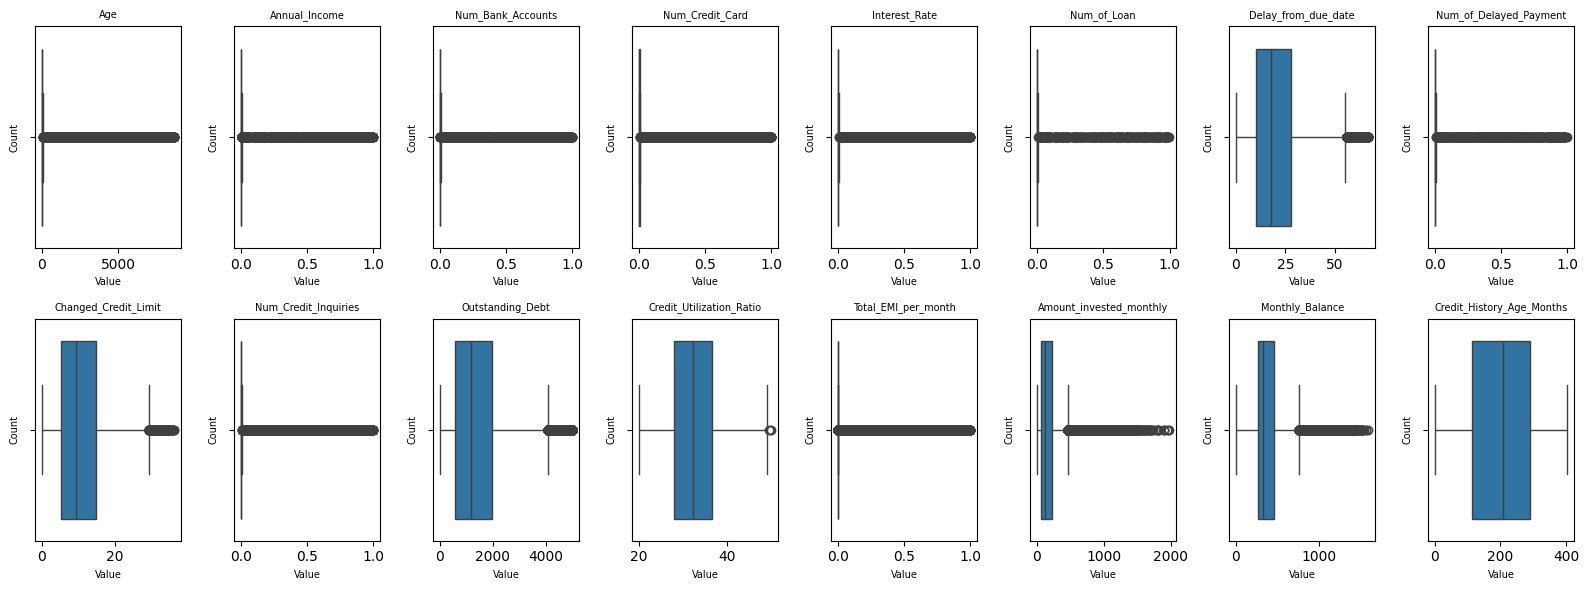

In [23]:
numeric_columns = train.select_dtypes(include=['int64', 'float64']).columns

num_columns = 8
num_rows = (len(numeric_columns) + num_columns - 1) // num_columns

fig, axes = plt.subplots(num_rows, num_columns, figsize=(16, 6))

axes = axes.flatten()

for i, column in enumerate(numeric_columns):
    sns.boxplot(x=train[column], ax=axes[i])
    axes[i].set_title(column, fontsize=7)
    axes[i].set_xlabel('Value', fontsize=7)
    axes[i].set_ylabel('Count', fontsize=7)

for j in range(len(numeric_columns), num_columns*num_rows):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

Scaling

In [24]:
# Tune kolom
train = train[train['Age'] < 60]
train = train[train['Num_Credit_Card'] <= 10]
train = train[train['Interest_Rate'] <= 50]
train = train[train['Num_of_Loan'] <= 12]
train = train[train['Num_Bank_Accounts'] <= 10]
train = train[train['Delay_from_due_date'] <= 60]
train = train[train['Changed_Credit_Limit'] <= 30]
train = train[train['Num_Credit_Inquiries'] <= 12]
train = train[train['Total_EMI_per_month'] <= 200]
train = train[train['Outstanding_Debt'] <= 1500]

Encoding

Label Encoder

In [25]:
categories = ['Poor', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Score_Encoded'] = encoder.fit_transform(train[['Credit_Score']])

In [26]:
# Encode Occupation

label_encoder = LabelEncoder()
train['Occupation_Encoded'] = label_encoder.fit_transform(train['Occupation'])

Ordinal Encoder

In [27]:
categories = ['Bad', 'Standard', 'Good']

encoder = OrdinalEncoder(categories=[categories])

train['Credit_Mix_Encoded'] = encoder.fit_transform(train[['Credit_Mix']])

In [28]:
categories_payment_behaviour = [
    'Low_spent_Small_value_payments',
    'Low_spent_Medium_value_payments',
    'Low_spent_Large_value_payments',
    'High_spent_Small_value_payments',
    'High_spent_Medium_value_payments',
    'High_spent_Large_value_payments'
]

encoder_payment_behaviour = OrdinalEncoder(categories=[categories_payment_behaviour])

train['Payment_Behaviour_Encoded'] = encoder_payment_behaviour.fit_transform(train[['Payment_Behaviour']])

Drop kolom yang tidak di encode

In [29]:
columns_to_drop = [ 'Payment_Behaviour', 'Credit_Mix', 'Occupation','Credit_Score']
train.drop(columns=columns_to_drop, inplace=True)

New Features

In [38]:
# Menghitung jumlah akun (Bank Accounts + Credit Cards)

train['Total_Num_Accounts'] = train['Num_Bank_Accounts'] + train['Num_Credit_Card']

# Menhgitung jumlah hutang per akun

train['Debt_Per_Account'] = train['Outstanding_Debt'] / train['Total_Num_Accounts']

# Menghitung perbandingan hutang dengan pemasukan

train['Debt_to_Income_Ratio'] = train['Outstanding_Debt'] / train['Annual_Income']

# Menghitung jumlah delayed payment per akun

train['Delayed_Payments_Per_Account'] = train['Num_of_Delayed_Payment'] / train['Total_Num_Accounts']

# Menghitung pengeluaran bulanan (EMI + Monthly Investments)

train['Total_Monthly_Expenses'] = train['Total_EMI_per_month'] + train['Amount_invested_monthly']

MI Score

In [30]:
categorical_columns = train.select_dtypes(include=['object']).columns

data_encoded = train.copy()

encoder = OrdinalEncoder()
data_encoded[categorical_columns] = encoder.fit_transform(data_encoded[categorical_columns])

y = data_encoded['Credit_Score_Encoded']
X = data_encoded.drop(columns=['Credit_Score_Encoded'])

mi_scores = mutual_info_classif(X, y)

for i, score in enumerate(mi_scores):
    print(f"Feature '{X.columns[i]}': Mutual Information Score = {score}")

Feature 'Age': Mutual Information Score = 0.007006459993856851
Feature 'Annual_Income': Mutual Information Score = 0.47691514232809995
Feature 'Num_Bank_Accounts': Mutual Information Score = 0.05941543987227971
Feature 'Num_Credit_Card': Mutual Information Score = 0.07176375694284265
Feature 'Interest_Rate': Mutual Information Score = 0.09580045400613435
Feature 'Num_of_Loan': Mutual Information Score = 0.022661175147075774
Feature 'Delay_from_due_date': Mutual Information Score = 0.06951327382985206
Feature 'Num_of_Delayed_Payment': Mutual Information Score = 0.05247450009791588
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.09446230536596345
Feature 'Num_Credit_Inquiries': Mutual Information Score = 0.034206881418206825
Feature 'Outstanding_Debt': Mutual Information Score = 0.4799833901655497
Feature 'Credit_Utilization_Ratio': Mutual Information Score = 0.0
Feature 'Payment_of_Min_Amount': Mutual Information Score = 0.07190583614649082
Feature 'Total_EMI_per_month': Mu

In [31]:
sorted_mi_scores = sorted(zip(X.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]

colorscale = 'Viridis'

fig = go.Figure(data=[go.Bar(x=sorted_columns, y=sorted_scores, marker=dict(color=sorted_scores, colorbar=dict(title='Mutual Information Score', len=0.5, y=0.2)))])

fig.update_layout(title='Mutual Information Scores for Each Feature',
                  xaxis_title='Features',
                  yaxis_title='Mutual Information Score')

fig.show()

##Model Evaluation

In [36]:
y = train['Credit_Score_Encoded']

X = train[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Outstanding_Debt', 'Total_EMI_per_month',
       'Credit_Mix_Encoded']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

Random Forest

In [37]:
model = RandomForestRegressor(n_estimators=500, bootstrap=True, random_state=77)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500, random_state=77)

MSE

In [39]:
# Hitung MSE
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.1754019874106567


Accuracy

In [40]:
rf_classifier = RandomForestClassifier(n_estimators=500, bootstrap=True)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500)

Accuracy on original test set: 0.7921582234559333

Classification report for original test set:
               precision    recall  f1-score   support

         0.0       0.75      0.65      0.70      1198
         1.0       0.82      0.85      0.84      5233
         2.0       0.74      0.73      0.74      2215

    accuracy                           0.79      8646
   macro avg       0.77      0.74      0.76      8646
weighted avg       0.79      0.79      0.79      8646



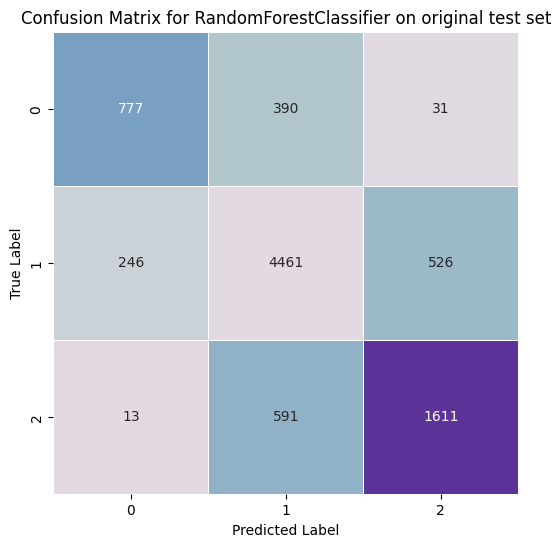

In [41]:
y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on original test set:", accuracy)

matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 6))
sns.heatmap(matrix, annot=True, cbar=False, cmap='twilight', linewidth=0.5, fmt="d")
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix for RandomForestClassifier on original test set')

print('\nClassification report for original test set:\n', classification_report(y_test, y_pred))